# Correlation Station

People who listen to Taylor Swift tend to be happier. Across the population, people who indicate they listen to Taylor Swift for longer, also rate themselves as being happier<sup>\*</sup>. In other words, happiness and Taylor Swift listening *covary*. This can be expressed as a correlation: a quantification of how much two variables relate to each other.

<small>\*</small><sub><sup>Note: Not actually based on peer-reviewed research.</sup><sub>

To illustrate the concept of correlation, let's turn to a dataset. We asked a bunch of Cambridge students<sup>\*</sup> how often they listen to Taylor Swift (minutes per day), and how happy they would rate themselves on a scale of 0-10. We also recorded what year they were in. We then divided the dataset into 6 groups: undergrad years 1-4, MPhil or equivalent, and PhD. We then sorted the data to match individuals across the 6 groups who reported the exact same listening time. Miraculously, the groups matched *perfectly*. The data are stored in the attached `happy_taytay.csv` file. In this file, each row represents individual participants with the exact same daily Swift listening time. Each column represents a variable: the first is daily Swift listening time, the second is the happiness rating of 1st Year undergrads, the third is the happiness rating of 2nd Year students, etc. until we reach the happiness rating of PhD students in the final column.

<small>\*</small><sub><sup>No, we didn't. We just made up some data.</sup><sub>

Let's load the dataset into Python first. We can do this via a helpful NumPy function called `loadtxt`. This function requires us to pass the path to the dataset (its name and location on your computer or wherefrom else you're loading it), and a few keyword arguments that determine how the data is loaded. The first of these is `dtype`, which specifies what type of data is in our file: floating point numbers, or floats. The second is `delimiter`, which specifies how values are separated from each other: by commas. The third is `skiprows`, which indicates how many rows should be skipped while loading the data: just one row, as this contains the header data (with variable names). Finally, there is `unpack`, which determines whether data is transposed or not: In our case it should be.

In [2]:
# Import the libraries that we'll use. These are again NumPy
# and Matplotlib.
import numpy
from matplotlib import pyplot

# Load the data from the attached data file.
data = numpy.loadtxt("happy_taytay.csv", dtype=float, \
    delimiter=",", skiprows=1, unpack=True)

print data.shape

(7, 1000)


Now that we have loaded the data, we can do some convenience renaming of variables. We will use `tay_minutes` for the number of minutes participants listen to Taylor Swift every day. We will use `happy_*` for the average happiness rating for each group, where the `*` indicates what group the happiness rating belongs to.

In [4]:
# Create variable names that are a bit easier to use.
# The amount of minutes each student has listened to Taylor 
# Swift is in the first row (at index 0!), and is spread
# across all columns ("all" is indicated by ":").
tay_minutes = data[0,:]
# The happiness data is in the second (at index 1!) until 
# the seventh (at index 6!) row.
happy_Y1 = data[1,:]
happy_Y2 = data[2,:]
happy_Y3 = data[3,:]
happy_Y4 = data[4,:]
happy_M = data[5,:]
happy_PhD = data[6,:]

To get a feel for what the data look like, let's plot all of the values in different sub-plots.

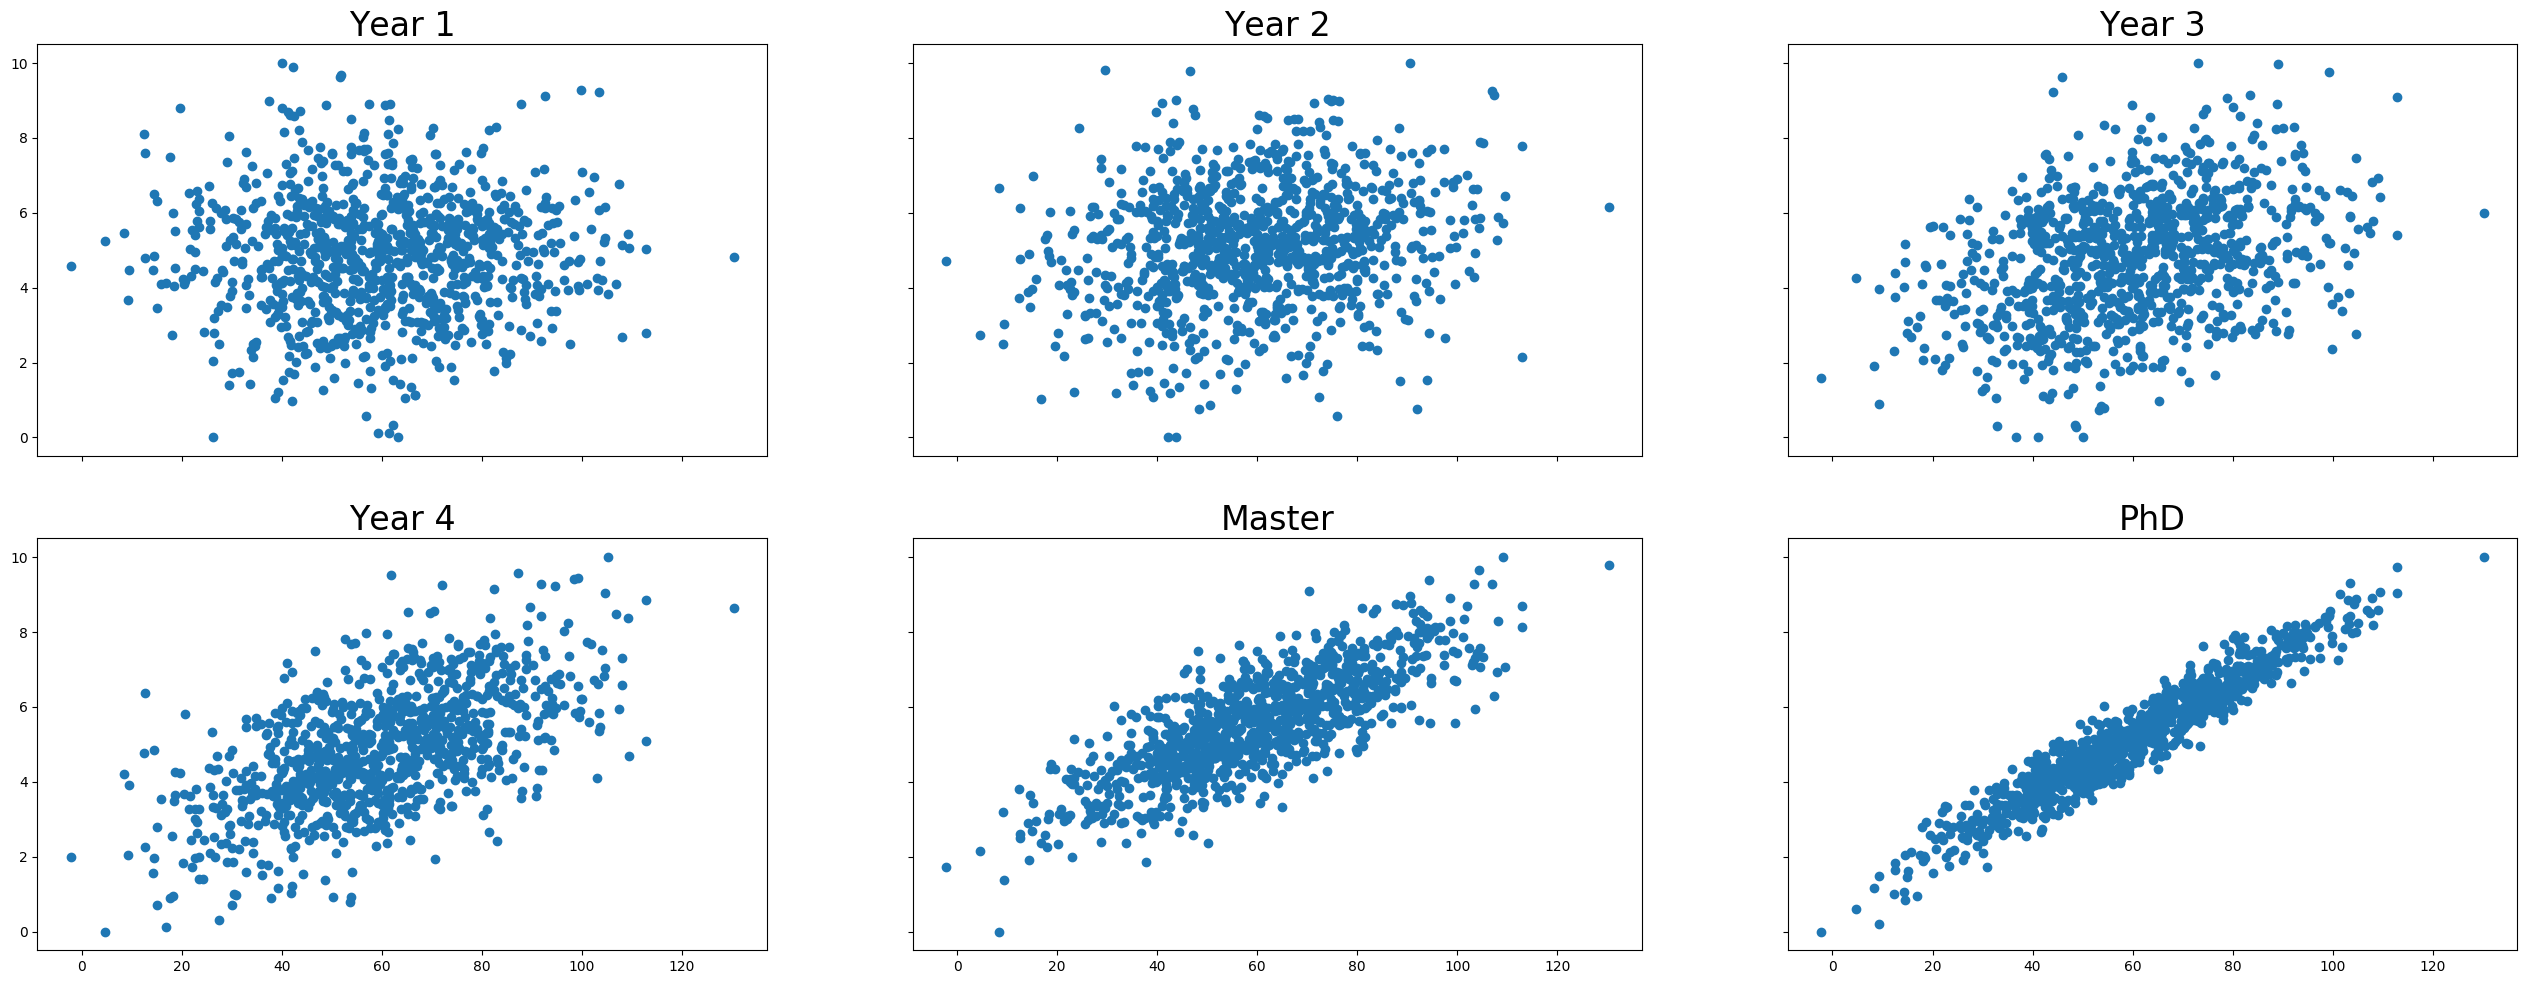

In [5]:
# First, create a new figure with a reasonably large size. 
# This size is indicated in inches, and the dpi argument
# sets the number of pixels per inch.
fig, ax = pyplot.subplots(nrows=2, ncols=3, \
    figsize=(32,12), dpi=100.0, sharex=True, sharey=True)

# First row, first column.
ax[0][0].set_title("Year 1", fontsize=24)
ax[0][0].plot(tay_minutes, happy_Y1, 'o')
# First row, second column.
ax[0][1].set_title("Year 2", fontsize=24)
ax[0][1].plot(tay_minutes, happy_Y2, 'o')
# First row, third column.
ax[0][2].set_title("Year 3", fontsize=24)
ax[0][2].plot(tay_minutes, happy_Y3, 'o')
# Second row, first column.
ax[1][0].set_title("Year 4", fontsize=24)
ax[1][0].plot(tay_minutes, happy_Y4, 'o')
# Second row, second column.
ax[1][1].set_title("Master", fontsize=24)
ax[1][1].plot(tay_minutes, happy_M, 'o')
# Second row, third column.
ax[1][2].set_title("PhD", fontsize=24)
ax[1][2].plot(tay_minutes, happy_PhD, 'o')

In which of the years do you think happiness relates to listening to Taylor Swift? In other words, in what year do you think the amount of minutes that student listens to Taylor Swift every day correlates with their happiness?

You can try to guess the degree of correlation in each plot by just eyeballing them. A more scientific approach would be to quantify the correlation in each plot. The most common correlation quantification is Pearson's correlation coefficient.

You can compute Pearson's coefficient manually (and we will later), but you can also just use an existing function from the Scientific Python package (SciPy). SciPy has a statistics sub-module, which has a `pearsonr` function. Let's load that first:

In [6]:
from scipy.stats import pearsonr

The `pearsonr` function returns two values: R and p. R is Pearson's correlation coefficient, and p is the associated p-value (which you've learned about in earlier practicals). We'll use the R, and ignore the p for now. Let's redraw the plots, but now add a correlation coefficient.

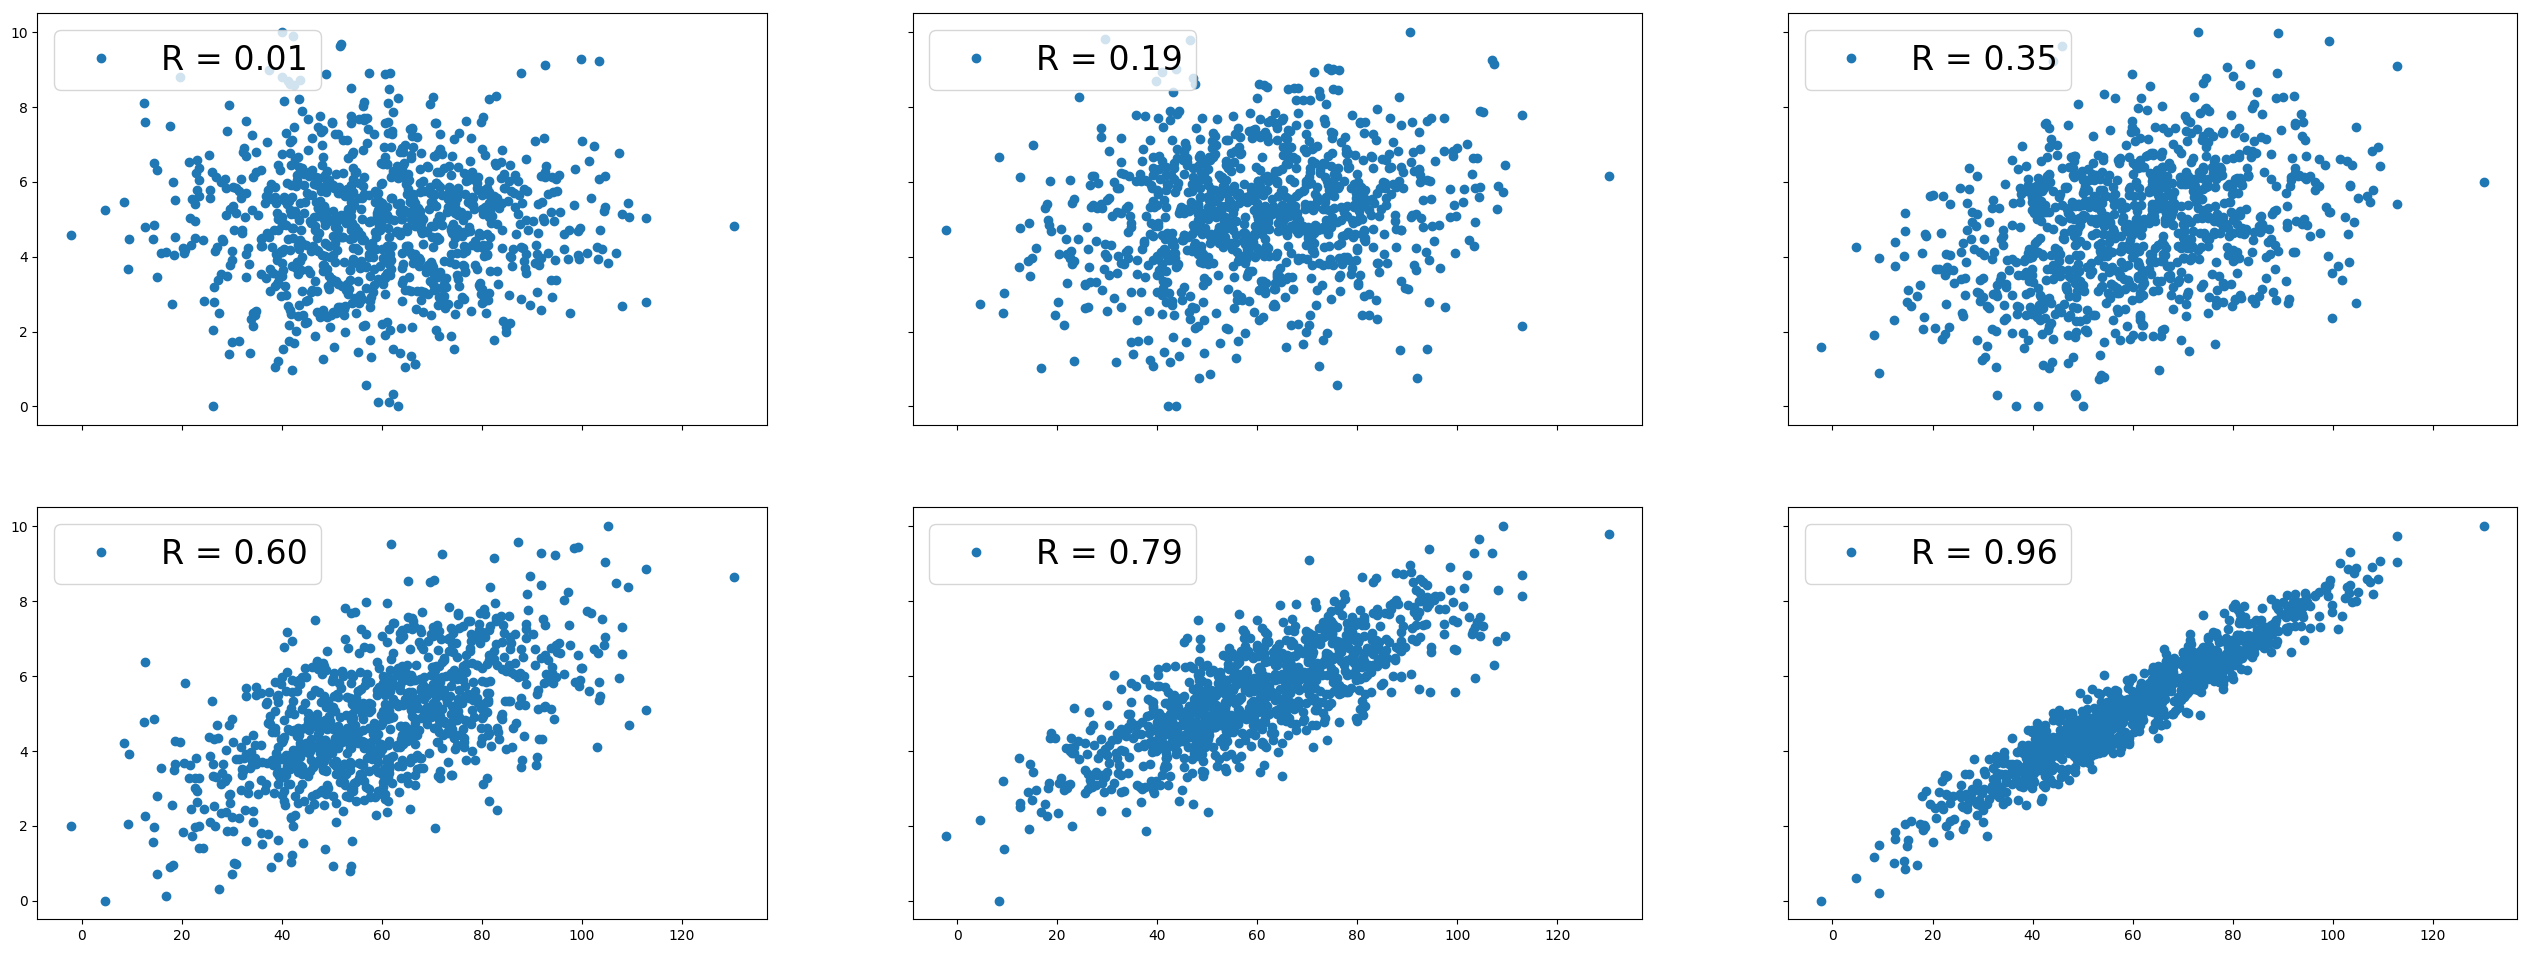

In [7]:
# Create a figure to plot data in. This is the same as 
# before.
fig, ax = pyplot.subplots(nrows=2, ncols=3, \
    figsize=(32,12), dpi=100.0, sharex=True, sharey=True)

# Now use a for-loop to go through all variables.
# NOTE: The following creates two variable that change
# on every iteration of the for loop:
#     i is the iteration number, starting at 0 and
#             going up by 1 on every iteration.
#     happy is the value of each variable in the 
#             list that is passed to the enumerate function.
for i, happy in enumerate([happy_Y1, happy_Y2, \
    happy_Y3, happy_Y4, happy_M, happy_PhD]):
    
    # Determine which row we should draw in. This is the 
    # integer division (ignoring any remainder) of i and
    # the number of columns.
    row = i // 3
    # Determine which column we should draw in. This is
    # the remainder after division of i and the number of
    # columns.
    col = i % 3
    
    # Compute the Pearson correlation for Swift listening
    # and the current group's happiness.
    r, p = pearsonr(tay_minutes, happy)
    
    # Create a label for the current group, including the
    # Pearson R.
    label = "R = %.2f" % (r)
    
    # Draw the data.
    ax[row][col].plot(tay_minutes, happy, 'o', label=label)

    # Draw a legend in the graph.
    ax[row][col].legend(loc="upper left", fontsize=24)

Pearson's correlation coefficient can vary between -1 (complete negative correlation), 0 (no correlation at all), and 1 (complete positive correlation). In the above figure, the top-left plot shows no correlation, whereas the bottom-right plot shows a near-perfect positive correlation.

From this, you could conclude that listening to Taylor Swift has no relation with happiness in Year 1 undergraduates, and a 1:1 relation with happiness in PhD students.

One interpretation for this result could be that listening to Taylor Swift determines a great deal of PhD students' happiness, but an equally supported interpretation would be that PhD students who are very happy listen to Taylor Swift more often. Alternatively, there could be a third factor that determines both happiness and Taylor Swift listening. For example, maybe having super peppy friends increases both PhD students' happiness and the amount of minutes they listen to Taylor Swift every day. In sum, **correlation does not imply causation**, it merely implies the existence of a direct or indirect relation.

## **Important**: Variance and Co-variance

Before you go on to learn ALL the things about correlation coefficients, it's good to get (re-)acquainted with two important concepts: *variance* and *covariance*.

Let's say we have a variable $x$, and it consists of the following numbers: $[9, 17, 11, 6, 4]$ There are 5 observations in $x$, and the mean $\bar{x}$ is 9.4

Let's say we have another variable $y$, and it consists of the following numbers: $[18, 10, 20, 14, 6]$ There are 5 observations in $y$, and the mean $\bar{y}$ is 13.6


**Variance** indicates how much individual observations deviate from the mean. To compute it, you follow these steps: 

1. Subtract the mean from every value (results in both positive and negative deviations from the mean).
2. Square those numbers to get rid of their sign (results in values that are higher the further away each observation was from the mean, in either direction)
3. Sum all the values.
4. Take the square root of the sum.

Or, in an equation:

$var(x) = \sqrt{\Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2}}$

Numerical example:

$var(x) = \sqrt{\Sigma^{5}_{i=1} (x_{i} - 9.4)^{2}}$

$var(x) = \sqrt{\Sigma [(9-9.4)^{2}, (17-9.4)^{2}, (11-9.4)^{2}, (6-9.4)^{2}, (4-9.4)^{2}] }$

$var(x) = \sqrt{\Sigma [-0.4^{2},  7.6^{2},  1.6^{2}, -3.4^{2}, -5.4^{2}]}$

$var(x) \approx \sqrt{\Sigma [0.16, 57.76,  2.56, 11.56, 29.16]}$

$var(x) \approx \sqrt{101.2}$

$var(x) \approx 10.06$

The higher the variance is, the more individual observations deviate from the mean of all observations.

**Co-variance** indicates to what extend observations in two variables deviate from the mean *at the same time*. In other words: covariance quantifies whether x rises when y rises as well. To compute it, follow these steps:

1. Subtract the mean of $x$ from every sample in $x$. (High positive or negative values indicate a large difference from the mean.)
2. Subtract the mean of $y$ from every sample in $y$. (High positive or negative values indicate a large difference from the mean.)
3. Multiply the values found in steps a and b. You now have one value for each observation. (High positive values indicate an observation was positively or negatively different from the mean in both $x$ and $y$; whereas high negative values indicate that an observation was positively different from the mean in $x$ but negatively in $y$, or vice versa.)
4. Sum all values obtained in step 3. (A gigh positive sum indicates that many observations were different from the mean in the same direction in both $x$ and $y$, and a high negative sum indicates that many observations were different from the mean in opposite directions between $x$ and $y$. Importantly, a sum that is closer to zero indicates that observations in $x$ and $y$ were not systematically different in the same or the opposite direction between $x$ and $y$.)
5. (Divide the value computed in step 4 by the number of observations. This makes the resulting value more analogous to the standard deviation, which is the variance divided by the number of observations.)

Or, in an equation:

$cov(x,y) = {{1} \over {n}} \Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$

Numerical example:

$cov(x,y) = {{1} \over {5}} \Sigma^{5}_{i=1} (x_{i} - 9.4) (y_{i} - 13.6)$

$cov(x,y) = 0.2 \Sigma [(9-9.4)*(18-13.6), (17-9.4)*(10-13.6), (11-9.4)*(20-13.6), (6-9.4)*(14-13.6), (4-9.4)*(6-13.6)]$

$cov(x,y) = 0.2 \Sigma [-0.4*4.4, 7.6*-3.6, 1.6*6.4, -3.4*0.4, -5.4*-7.6]$

$cov(x,y) \approx 0.2 \Sigma [ -1.76, -27.36,  10.24,  -1.36,  41.04]$

$cov(x,y) \approx 0.2 * 20.8$

$cov(x,y) \approx 4.16$

**Correlation** is the ratio between the covariance of two variables and their respective variances.

## What is this correlation magic, and how can I do it myself?!

At this point, Pearson's correlation coefficient (also known as Pearson's R) will probably look like a bit of a black box. To give you some more insight into how it works, let's examine the coefficient a bit further. In short, Pearson's R is calculated by dividing two populations' covariance by the product of their standard deviations. Or, in a formula:

$\rho_{X,Y} = {{cov(X,Y)} \over {\sigma_{X}\sigma_{Y}}}$

For a sample, the formula looks considerably more scary:

$r_{x,y} = {{\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})} \over {\sqrt{\Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2}} \sqrt{\Sigma^{n}_{i=1} (y_{i} - \bar{y})^{2}}}}$

Although your initial reaction might be to blindly glance over the equations, it might be good to think about what they mean. Let's break them down into smaller parts.

First, $x$ and $y$ represent variables. For example, $x$ could be "minutes listened to Taylor Swift per day", and $y$ could be "self-reported happiness rating".

Probably the most simple bit of the equation is $x_{i} - \bar{x}$. This simply means "subtract the average value of x ( $\bar{x}$ ) from the current value of x ( $x_{i}$ )".

Why does it say "the current value of x"? Well, that's because the big sigma ($\Sigma$) is a *sum operator*. It goes through all values of the variable $x$, does something with them (defined after the sigma), and then adds up all outcomes. You might have noticed the $n$ in $\Sigma^{n}$: that simply means "the number of values in the variable x". (For example, 1000 students' Taylor Swift listening minutes.) Finally, there is the $i=1$ bit in $\Sigma^{n}_{i=1}$. This means "start at the first observation". So, in sum, the sum operator goes through all observations, does something to them, and then adds the outcomes up in one big total value.

Saying the sum operator "does something" to the values is a bit vague. Here, we have a sum operator above the line (the numerator) that reads $\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$ Here, the "does something" means is $(x_{i} - \bar{x}) (y_{i} - \bar{y})$, which means "multiply $x_{i} - \bar{x}$ with $y_{i} - \bar{y}$". We had already established that "$x_{i} - \bar{x}$" means "subtract the average of x from the current value of x".

We can write this in Python code:

In [62]:
# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads 
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Count the number of observations we have.
n = len(x)

# Start with a sum value of 0.
s = 0.0

# Loop through all observations.
for i in range(n):
    # Subtract the current values of x and y from their
    # respective averages, and multiply them. Add the
    # outcome to the sum.
    s += (x[i] - mean_x) * (y[i] - mean_y)

print("Sum = %.2f" % (s))

Sum = 11671.90


Fortunately, we can write this a in a shorter way, by using NumPy's `sum` function:

In [63]:
s = numpy.sum( (x - mean_x) * (y-mean_y) )

print("Sum = %.2f" % (s))

Sum = 11671.90


This particular sum, $\Sigma^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})$, is called the "covariation of x and y". (Actually, you would divide this sum by the number of observations to obtain the covariance.)

Another part of the Pearson R equation was the bit below the line (the denominator), which includes $\sqrt{\Sigma^{n}_{i=1}(x_{i}-\bar{x})^2}$. Let's work from the inside-out: We already know that $x_{i}-\bar{x}$ means "subtract the average value of x from the current value of x". Here, that value is then squared: $(x_{i}-\bar{x})^2$. All of these squares are then summed together (sum of squares!). Finally, the square root of this sum is calculated.

You might recognise this value as the *variance*.

Let's compute the values in Python:

In [64]:
squares = (x - mean_x)**2
sum_of_squares = numpy.sum(squares)
variance = numpy.sqrt(sum_of_squares)

print("Variance = %.2f" % (variance))

Variance = 628.19


You can write this in a single line:

In [65]:
var_x = numpy.sqrt(numpy.sum((x-mean_x)**2))

print("Variance = %.2f" % (var_x))

Variance = 628.19


Combining what you learned above, you can compute the Pearson correlation of two values yourself!

In [66]:
# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads 
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Compute the covariance of x and y.
cov = numpy.sum( (x - mean_x) * (y-mean_y) )
# Compute the variance of x.
var_x = numpy.sqrt(numpy.sum((x-mean_x)**2))
# Compute the variance of y.
var_y = numpy.sqrt(numpy.sum((y-mean_y)**2))

# Compute Pearson's R!
r = cov / (var_x * var_y)

print("Pearson's R = %.2f" % r)

Pearson's R = 0.35


Final check to see if this matches what SciPy's Pearson R function produces:

In [67]:
r, p = pearsonr(x,y)

print("Pearson's R = %.2f" % r)

Pearson's R = 0.35


Woop! You can now use and manually compute a Pearson correlation coefficient!

# Non-parametric correlation coefficients

Pearson's correlation is what is referred to as a *parametric test*. This is because it assumes that the values in both variables (x and y) were drawn from a normal distribution. In practice, this won't always hold true.

### Spearman's Rho

If you want to compute a correlation, but your data are *not* normally distributed, the closest alternative might just be Spearman's $\rho$ (Greek letter "rho"). Not unlike [the honey badger](https://www.youtube.com/watch?v=4r7wHMg5Yjg), Spearman doesn't care about how your data is distributed. Instead, it simply rank-orders all the values in both variables.

Spearman's $\rho$ thus depends on the covariance of the ranked variables x and y, not on their actual values. The equation is:

$\rho = {{cov(rg_{x}, rg_{y})} \over {\sigma_{rg_{x}} \sigma_{rg_{y}}}}$

Here, $rg_{x}$ is simply the rank-score of each value in the variable x. For example, if $x = [2, 5, 3]$ then $rg_{x} = [1, 3, 2]$. $\sigma_{rg_{x}}$ is the standard deviation of the rank-scored values.

**Important note**: the covariance here is subtly different from the covariance in the equation for Pearson's correlation coefficient. Specifically, the value is computed in exactly the same way, but for Spearman's $\rho$ it is divided by the number of observations.

Let's see Spearman's $\rho$ in practice:

In [68]:
# Import a function that can rank-score our data.
from scipy.stats import rankdata

# Let's take Taylor Swift listening as 'x' values.
x = rankdata(tay_minutes)
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = rankdata(happy_Y3)
mean_y = numpy.mean(y)

# Count the number of observations, and save it as a 
# floating point number.
n = float(len(x))

# Compute the covariance of the ranked x and y.
cov = numpy.sum( (x - mean_x) * (y-mean_y) ) / n
# Compute the standard deviations of the ranked x and y.
sd_x = numpy.std(x)
sd_y = numpy.std(y)

# Compute rho
rho = cov / (sd_x * sd_y)

print("Spearman's rho = %.2f" % (rho))

Spearman's rho = 0.34


Fortunately, we can simply refer to a pre-existing function in SciPy's `stats` sub-module:

In [69]:
# Import the spearmanr function from SciPy
from scipy.stats import spearmanr

# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
mean_x = numpy.mean(x)
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = happy_Y3
mean_y = numpy.mean(y)

# Compute the Spearman rank correlation coefficient.
rho, p = spearmanr(x, y)

print("Spearman's rho = %.2f" % (rho))

Spearman's rho = 0.34


### Kendall's tau

Conceptually, Spearman's $\rho$ maps onto Pearson's $r$ very nicely. However, it is not the only option you have to compute a non-parametric correlation coefficient. There is also Kendall's $\tau$.

Kendall's $\tau$ is computed differently from both of the other correlation coefficients you have seen here. It does require you to rank-order your data, just like for Spearman's $\rho$. However, it then does something funky with that rank-ordered data: It starts looking at pairs of ranked observations!

For example, let's look at two pairs of observations: Participant 1 and participant 2. We know that participant 1 listens to about 67 minutes of Taylor Swift per day, and scored their happiness as 6.68; the associated rank scores are 615 and 892. We also know that participant 2 listens to about 39 minutes of Taylor Swift per day, and scored their happiness as 1.77; the associated rank scores are 136 and 27. Because 136 is smaller than 615, and 27 is smaller than 892, participants 1 and 2 count as a *concordant pair*.

Run the code below to see for yourself:

In [70]:
# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
rg_x = rankdata(x)
# Let's take the happiness ratings of Year 3 undergrads 
# as 'y' values.
y = happy_Y3
rg_y = rankdata(y)

print("Participant 1 data: Tay minutes = %.2f, happy = %.2f" \
    % (x[0], y[0]))
print("Participant 2 data: Tay minutes = %.2f, happy = %.2f" \
    % (x[1], y[1]))

print("Participant 1 rank data: Tay minutes = %d, happy = %d" \
    % (rg_x[0], rg_y[0]))
print("Participant 2 rank data: Tay minutes = %d, happy = %d" \
    % (rg_x[1], rg_y[1]))

Participant 1 data: Tay minutes = 65.67, happy = 6.68
Participant 2 data: Tay minutes = 39.17, happy = 1.77
Participant 1 rank data: Tay minutes = 615, happy = 892
Participant 2 rank data: Tay minutes = 136, happy = 27


If participant 1 had had a lower happiness ranking than participant 2 while also having a higher Taylor-Swift-listening ranking, the pair would be counted as *disconcordant*.

If participant 1 and 2 had the exact same ranked values, they wouldn't count.

After counting all concordant and disconcordant pairs, Kendall's $\tau$ can be computed like this:

$\tau = {{N_{concordant} - N_{disconcordant}} \over {n (n-1)/2}}$

Again, fortunately for us, SciPy has a function for this:

In [71]:
from scipy.stats import kendalltau

# Let's take Taylor Swift listening as 'x' values.
x = tay_minutes
# Let's take the happiness ratings of Year 3 undergrads
# as 'y' values.
y = happy_Y3

# Compute Kendall's tau
tau, p = kendalltau(x, y)

print("Kendall's tau = %.2f" % (tau))

Kendall's tau = 0.23


Although the value for Kendall's $\tau$ is lower than Spearman's $\rho$ and Pearson's $r$, that does not mean it doesn't count as much. In fact, lower values of Kendall's $\tau$ correspond to higher values of Spearman's $\rho$ or Pearson's $r$. (For example, a Pearson R of 0.8 is equivalent to a Kendall $\tau$ of 0.6)

If you want to know more about why Kendall's $\tau$ is more powerful than the other two correlation coefficients, please read the following article:

- Bonett, D. G., & Wright, T. A. (2000). Sample size requirements for estimating Pearson, Kendall, and Spearman correlations. *Psychometrika*, *65*(1), 23–28.

# Conclusion

There exist three main correlation coefficients. You can only use Pearson's $r$ if your data is normally distributed. You can always use either Spearman's $\rho$ or Kendall's $\tau$, both of which are non-parametric tests. Kendall's $\tau$ is more powerful than Spearman's $\rho$.